In [14]:
using Photochemistry
using PyCall
using PyPlot
using LaTeXStrings

include("PARAMETERS.jl");

In [5]:
ncur_test = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/success-runs/with-o2pl-opl-co2pl-imperfect/converged_temp_216_130_205.h5");

In [98]:
function plot_Jrates(ncur, t, exptype, filenameext="")
    #=
    Plots the Jrates for each photodissociation or photoionizaiton reaction.

    ncur: the atmospheric state to plot 
    t: the non-mean value of the temperature for T_exptype, i.e. might be 150 for T_surf instead of the mean 216.
    exptype: whether the "surf", "tropo" or "exo" temperature is the parameter being examined
    filenameext: something to append to the image filename
    =#

    # --------------------------------------------------------------------------------
    # calculate reaction rates x density of the species at each level of the atmosphere.
    rxd_prod = make_ratexdensity(ncur, t, exptype, which="Jrates")
    # rxd_consume = make_ratexdensity(ncur, t, exptype, species=sp, species_role="reactant")

    # ---------------------------------------------------------------------------------
    # Plot reaction rates and transport rates by altitude
    rcParams = PyCall.PyDict(matplotlib."rcParams")
    rcParams["font.sans-serif"] = ["Louis George Caf?"]
    rcParams["font.monospace"] = ["FreeMono"]
    rcParams["font.size"] = 12
    rcParams["axes.labelsize"]= 16
    rcParams["xtick.labelsize"] = 16
    rcParams["ytick.labelsize"] = 16

    whichax = Dict("HO2"=>1, "H2"=>1, "H2O"=>1, "H2O2"=>1, "H"=>1, "OH"=>1, 
                   "HDO"=>2, "HDO2"=>2, "HD"=>2, "DO2"=>2, "OD"=>2, 
                   "CO"=>3, "CO2"=>3, "O"=>3, "O3"=>3, "O2"=>3, 
                   "N2"=>4, "NO2"=>4, "N2O"=>4, "NO"=>4)
    
    fig, ax = subplots(1, 4, sharey=true, figsize=(36,6))
    subplots_adjust(wspace=0.7, bottom=0.25)
    for a in ax
        plot_bg(a)
    end
    
    minx = Array{Float64, 1}([1e10, 1e10, 1e10, 1e10])
    maxx = Array{Float64, 1}([0, 0, 0, 0])
    
    # Collect chem production equations and total 
    for kv in rxd_prod  # loop through the dict of format reaction => [rates by altitude]
        axnum = whichax[match(r".+(?=\ -->)", kv[1]).match] # different species go onto different axes to keep things tidy
        lbl = "$(kv[1])"
        ax[axnum].semilogx(kv[2], alt[1:length(alt)-2]./1e5, linestyle="-", linewidth=1, label=lbl)
        
        # set the xlimits
        if minimum(kv[2]) <= minx[axnum]
            minx[axnum] = minimum(kv[2])
        end
        if maximum(kv[2]) >= maxx[axnum]
            maxx[axnum] = maximum(kv[2])
        end
    end
    

    suptitle("J rates", fontsize=20)
    ax[1].set_ylabel("Altitude (km)")
    for i in range(1, stop=4)
        ax[i].legend(bbox_to_anchor=(1.01, 1))
        ax[i].set_xlabel("Chemical reaction rate [check units] ("*L"cm^{-3}s^{-1})")
        # labels and such 
        if minx[i] < 1e-20
            minx[i] = 1e-20
        end
        maxx[i] = 10^(ceil(log10(maxx[i])))
        ax[i].set_xlim([minx[i], maxx[i]])
        end
    ax[1].set_title("H")
    ax[2].set_title("D")
    ax[3].set_title("C and O species")
    ax[4].set_title("N species")
    savefig(results_dir*"J_rates_.png", bbox_inches="tight", dpi=300)
    show()
    close(fig)
end



plot_Jrates (generic function with 2 methods)

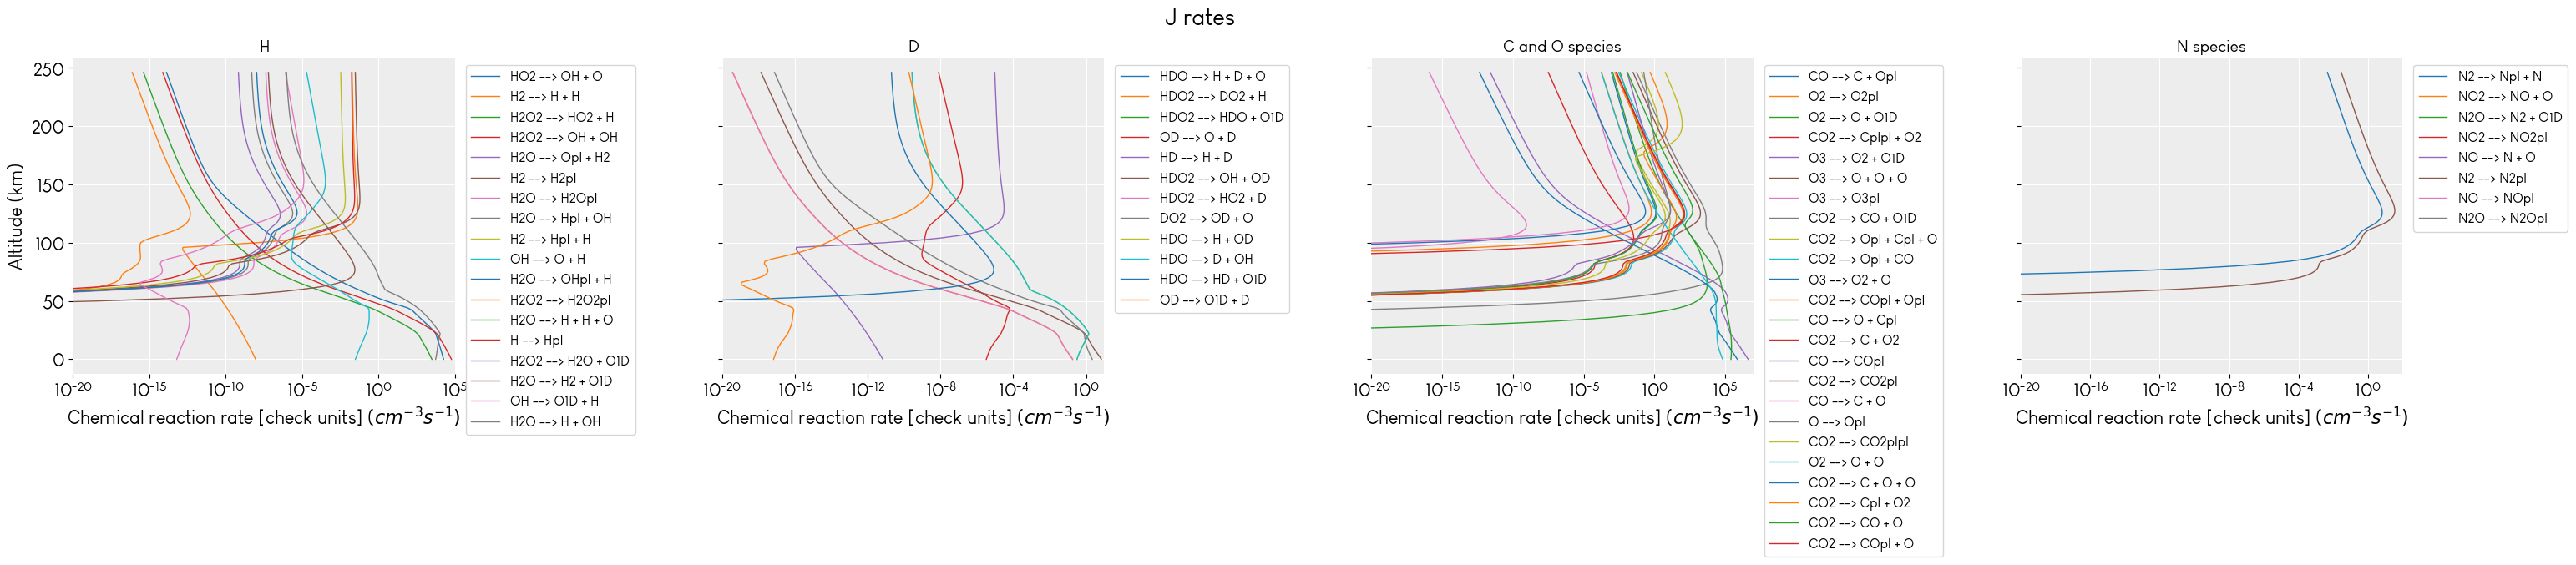

In [99]:
plot_Jrates(ncur_test, 216.0, "surf")